In [1]:
import numpy as np
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
def show_image(image):

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
def sad_matching(img, template):
    img = img.copy()
    h, w, _ = img.shape
    templ_h, templ_w, _ = template.shape
    
    res_h = h - templ_h + 1
    res_w = w - templ_w + 1
    res = np.zeros((h-templ_h+1, w-templ_w+1))
    
    for i in range(res_h):
        for j in range(res_w):
            search = img[i:i+templ_h, j:j+templ_w]
            res[i,j] = np.sum(np.abs(search - template))
    return res

In [5]:
CV_SAD_METHOD = 'CV_SAD'

In [66]:
def img_match(img, templ, match_method):
    
    img_display = img.copy()
    
    if match_method == CV_SAD_METHOD:
        result = sad_matching(img, templ)
    else:
        result = cv2.matchTemplate(img, templ, match_method)
        
    _minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(result, None)
    if match_method == cv2.TM_CCORR_NORMED:
        matchLoc = maxLoc
        matchVal = _maxVal
    else:
        matchLoc = minLoc
        matchVal = _minVal
        
    print('Min match val: {}'.format(_minVal))
    print('Max match val: {}'.format(_maxVal))
    
    display = img.copy()
    cv2.rectangle(display, matchLoc, (matchLoc[0] + template.shape[1], matchLoc[1] + template.shape[0]), (255,0,0), 2, 8, 0 )
    

    cv2.rectangle(img_display, matchLoc,
                  (matchLoc[0] + templ.shape[0], matchLoc[1] + templ.shape[1]),
                  (0,0,0), 2, 8, 0 )

    show_image(img_display)


In [67]:
def read_img(img_path='./resources/Car1/img/0001.jpg'):

    return cv2.imread(img_path)

In [68]:
image_1 = read_img()
image_1.shape

(240, 320, 3)

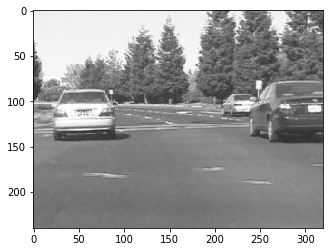

In [69]:
show_image(image_1)

In [70]:
template = read_img(img_path='./resources/Car1/img/template.jpg')
template.shape

(58, 73, 3)

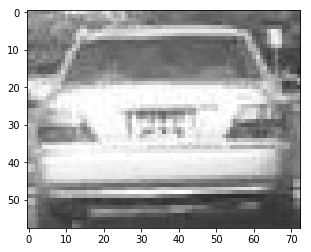

In [71]:
show_image(template)

In [72]:
sad_matching(image_1, template)

array([[1503033., 1494918., 1492215., ..., 1663632., 1647669., 1645434.],
       [1488963., 1487148., 1482285., ..., 1652982., 1636296., 1638834.],
       [1486485., 1478670., 1475502., ..., 1638555., 1644984., 1646919.],
       ...,
       [1555512., 1560465., 1563825., ..., 1505652., 1505409., 1505172.],
       [1571949., 1564416., 1566843., ..., 1507647., 1508988., 1508037.],
       [1573899., 1569309., 1567782., ..., 1497543., 1499712., 1501899.]])

## SSD

Min match val: 52958.0
Max match val: 134819264.0


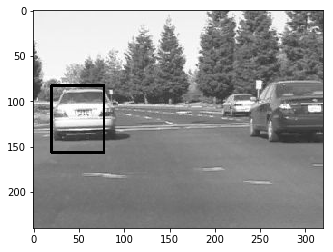

In [73]:
img_match(image_1, template, match_method=cv2.TM_SQDIFF)

exact match!

Min match val: 38119800.0
Max match val: 141780464.0


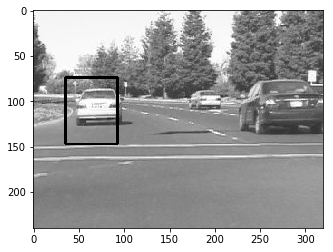

In [74]:
image_2 = read_img('./resources/Car1/img/0054.jpg')
image_2.shape
img_match(image_2, template, match_method=cv2.TM_SQDIFF)

Image is little bit different

Min match val: 51356444.0
Max match val: 167370016.0


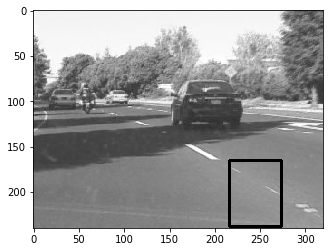

In [75]:
image_2 = read_img('./resources/Car1/img/0250.jpg')
image_2.shape
img_match(image_2, template, match_method=cv2.TM_SQDIFF)

could not find the template

## NCC

Min match val: 0.8066775798797607
Max match val: 0.9999290704727173


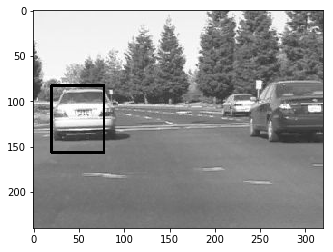

In [76]:
image_1 = read_img('./resources/Car1/img/0001.jpg')
image_1.shape
img_match(image_1, template, match_method=cv2.TM_CCORR_NORMED)

exact match

Min match val: 0.7885315418243408
Max match val: 0.9476091265678406


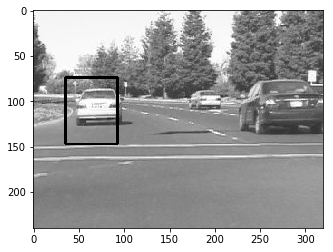

In [77]:
image_1 = read_img('./resources/Car1/img/0054.jpg')
image_1.shape
img_match(image_1, template, match_method=cv2.TM_CCORR_NORMED)

shifted a little bit, but pretty much the same

Min match val: 0.7711275815963745
Max match val: 0.9466602206230164


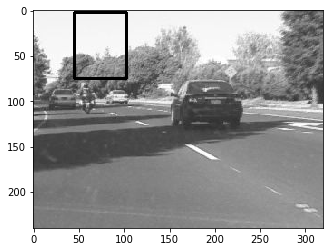

In [78]:
image_1 = read_img('./resources/Car1/img/0250.jpg')
image_1.shape
img_match(image_1, template, match_method=cv2.TM_CCORR_NORMED)

box is not there

## SAD

Min match val: 1240404.0
Max match val: 1934271.0


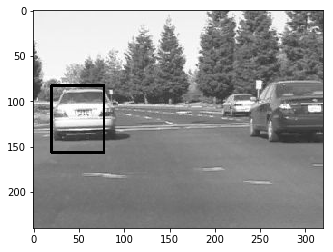

In [79]:
image_1 = read_img('./resources/Car1/img/0001.jpg')
image_1.shape
img_match(image_1, template, match_method=CV_SAD_METHOD)

Min match val: 1367163.0
Max match val: 1925382.0


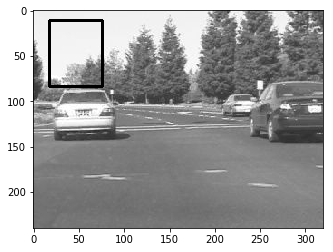

In [80]:
image_1 = read_img('./resources/Car1/img/0002.jpg')
image_1.shape
img_match(image_1, template, match_method=CV_SAD_METHOD)

Min match val: 1293117.0
Max match val: 1910223.0


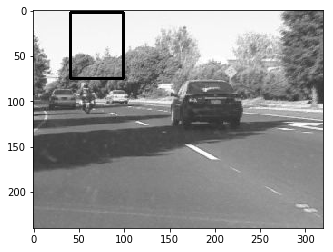

In [81]:
image_1 = read_img('./resources/Car1/img/0250.jpg')
image_1.shape
img_match(image_1, template, match_method=CV_SAD_METHOD)

different box